# Classification project neural network

## import libray

In [1]:
import numpy as np
import pandas as pd
#Deviding the data set 
from sklearn.model_selection import train_test_split
# neural network
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score ,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## select columns

In [2]:
columns = [
    'wifi_01',
    'wifi_02',
    'wifi_03',
    'wifi_04',
    'wifi_05',
    'wifi_06',
    'wifi_07',
    'room'
    ]

## function read data

In [3]:
def redData(path):
    # read selected data
    data = pd.read_csv(path,usecols=columns)
    
    # rescaling data
    for i in range(0,len(columns)-1):
        data[columns[i]] = (data[columns[i]] - data[columns[i]].min()) / (data[columns[i]].max()-data[columns[i]].min())
    
    # convert data to numpy matrix
    cols = data.shape[1]
    xd = data.iloc[:,0:cols-1]
    yd = data.iloc[:,cols-1:cols] 
    x = np.matrix(xd.values)
    y = np.matrix(yd.values)
    
    return x,y,data

## read data

In [4]:
X,y,data = redData('../data/data_clean.csv')

## split data to two part : taning 80% and test 20%

In [5]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
print ("X_train.shape",X_train.shape)
print ("Y_train.shape",y_train.shape)
print ("X_test.shape",X_test.shape)
print ("Y_test.shape",y_test.shape)

X_train.shape (1600, 7)
Y_train.shape (1600, 1)
X_test.shape (400, 7)
Y_test.shape (400, 1)


## training par

In [6]:
_alpha =0.1 #2
_hiddenLS = (7, 6)
# clf = MLPClassifier(solver='lbfgs', alpha=_alpha, hidden_layer_sizes=_hiddenLS, random_state=1,verbose=False)
# clf.fit( X_train, y_train )

clf = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=_hiddenLS, random_state=1)
clf.fit(X_train, y_train)

D:\_Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\_Dev\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(7, 6), random_state=1,
              solver='lbfgs')

## testing part

In [7]:
prediction = clf.predict(X_test)
print("Predection : /n", prediction.T)
print("Class y : /n",  y_test.T)

Predection : /n [4 1 3 3 2 2 4 3 3 3 4 3 1 2 2 2 2 1 3 4 2 2 3 1 3 3 2 2 4 4 2 1 1 4 3 3 1
 2 1 1 1 1 4 4 1 3 1 4 2 3 2 2 1 4 4 3 2 1 4 3 2 3 1 4 3 2 3 3 4 2 3 1 3 1
 4 4 3 4 2 3 3 3 4 2 3 3 2 4 4 4 1 1 2 4 1 1 2 2 3 2 1 4 2 3 1 3 4 3 1 1 2
 1 2 4 3 1 2 1 4 2 3 3 2 2 2 2 4 1 1 1 3 1 2 1 4 1 4 3 4 1 4 3 1 2 1 4 2 4
 3 1 1 2 2 3 2 4 3 3 1 4 2 3 3 1 3 2 4 1 1 3 4 3 2 4 1 2 4 4 3 3 4 4 2 1 1
 1 4 4 3 3 1 1 4 3 2 1 4 4 3 2 2 3 2 4 1 1 4 2 2 3 3 2 1 4 1 1 4 2 3 1 2 2
 2 2 4 3 1 3 1 1 1 2 2 2 3 2 4 1 2 4 1 2 3 3 2 1 4 2 2 4 1 3 4 1 3 3 2 2 4
 1 4 4 4 1 1 4 4 3 4 3 1 4 2 2 3 2 1 4 1 3 2 2 4 2 2 1 1 4 4 1 2 2 4 1 2 4
 1 4 4 4 4 3 2 3 2 3 3 4 4 1 4 3 2 1 2 2 2 1 4 2 4 4 1 2 1 4 2 3 1 3 1 4 2
 4 1 2 4 3 2 4 3 4 3 3 3 4 1 4 3 1 2 1 2 3 3 4 3 2 2 3 2 3 4 3 4 1 3 1 4 4
 3 3 1 4 2 3 2 1 1 4 2 4 3 2 2 2 4 4 3 2 2 2 3 4 2 2 1 3 1 1]
Class y : /n [[4 1 3 3 2 2 4 3 3 3 4 3 1 2 2 2 2 1 3 4 2 2 3 1 3 3 2 2 4 4 2 1 1 4 3 3
  1 2 1 1 1 1 4 4 1 3 1 4 2 3 2 2 1 4 4 3 2 1 4 3 2 3 1 4 3 2 3 3 4 2 3 1
  3 1 4 4 3

## confusion matrix 

In [8]:
c_m =confusion_matrix(y_test,prediction)
print('confusion matrix :\n',c_m,"\n")

confusion matrix :
 [[ 95   0   0   0]
 [  0 106   1   0]
 [  1   1  95   0]
 [  0   0   0 101]] 



## The accuracy

In [9]:
print('The accuracy :',metrics.accuracy_score(prediction,y_test))

The accuracy : 0.9925


## other

D:\_Dev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


The accuracy : 0.9925 

presicion score : 0.9925 

recall score : 0.9925 

f1 score : 0.9925 



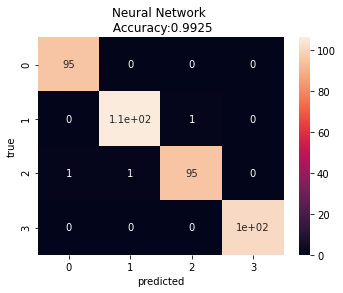

              precision    recall  f1-score   support

       room1       0.99      1.00      0.99        95
       room2       0.99      0.99      0.99       107
       room3       0.99      0.98      0.98        97
       room4       1.00      1.00      1.00       101

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [10]:
#-----------------------------------------------------------------------------
p_s= metrics.accuracy_score(prediction,y_test)
print('The accuracy :',p_s,"\n")
#-----------------------------------------------------------------------------
p_s= precision_score(y_test, prediction,pos_label='positive',average='micro')
print('presicion score : {}'.format(p_s),"\n")
#-----------------------------------------------------------------------------
r_s=recall_score(y_test, prediction,pos_label='positive',average='micro')
print('recall score : {}'.format(r_s),"\n")
#-----------------------------------------------------------------------------
f1_s= f1_score(y_test, prediction ,pos_label='positive',average='micro')
print('f1 score : {}'.format(f1_s),"\n")
#-----------------------------------------------------------------------------
df_cm = pd.DataFrame(c_m,  index = [i for i in range(0,4)], columns = [i for i in range(0,4)])
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Neural Network \n Accuracy:{}'.format(metrics.accuracy_score(y_test, prediction)))
plt.ylabel('true')
plt.xlabel('predicted')
plt.show()

print(classification_report(y_test,prediction,target_names=['room1','room2','room3','room4']))
